<h2>Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('Big Mart Sales.csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<h2>Handling Missing Data

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df['Item_Weight'].replace(np.nan, df['Item_Weight'].mean(axis=0), inplace=True)

In [9]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
df['Outlet_Size'].replace(np.nan,'Medium', inplace=True)

In [11]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
# Standardizing Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat', inplace=True)
df['Item_Fat_Content'].replace('reg','Regular', inplace=True)

In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
df[df==0].count()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [17]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0, df['Item_Visibility'].mean())

In [18]:
df[df==0].count()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
encoder = [LabelEncoder() for i in range(7)]
for i in range(7):
    encoder[i].fit(df[columns[i]])
    df[columns[i]] = encoder[i].transform(df[columns[i]])    

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052


<h2>Handling Outliers

In [21]:
def Outlier_list(column):
    li = list(df[column][np.abs(stats.zscore(df[column])) > 3].index)
    return li
def Scatter(column):
    plt.figure(figsize=[4,4])
    plt.scatter(df[column].index, df[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

Outliers in Item_Identifier are: []


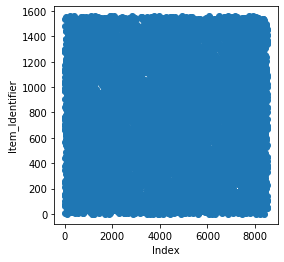

In [22]:
li = Outlier_list(column='Item_Identifier')
print('Outliers in Item_Identifier are:', li)
Scatter(column='Item_Identifier')

Outliers in Item_Weight are: []


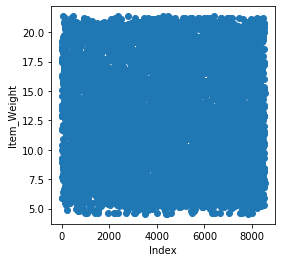

In [23]:
li = Outlier_list(column='Item_Weight')
print('Outliers in Item_Weight are:', li)
Scatter(column='Item_Weight')

Outliers in Item_Fat_Content are: []


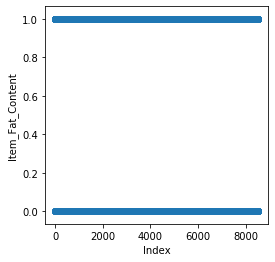

In [24]:
li = Outlier_list(column='Item_Fat_Content')
print('Outliers in Item_Fat_Content are:', li)
Scatter(column='Item_Fat_Content')

Outliers in Item_Visibility are: [49, 83, 108, 174, 434, 502, 521, 532, 847, 854, 1159, 1272, 1291, 1311, 1324, 1434, 1496, 1501, 1560, 1575, 1644, 1651, 1805, 1827, 1841, 2088, 2122, 2251, 2324, 2439, 2445, 2586, 2613, 2728, 2855, 2895, 3017, 3206, 3399, 3458, 3474, 3488, 3497, 3540, 3750, 3767, 3884, 3993, 4006, 4219, 4382, 4408, 4530, 4538, 4656, 4674, 4789, 4941, 4987, 5031, 5050, 5150, 5287, 5374, 5732, 5734, 5795, 5837, 5880, 5891, 5946, 6008, 6012, 6179, 6536, 6576, 6622, 6674, 6786, 6903, 7005, 7088, 7107, 7121, 7215, 7250, 7278, 7388, 7499, 7558, 7603, 7744, 7866, 7949, 8194, 8215, 8273, 8345, 8432]
Size: 99


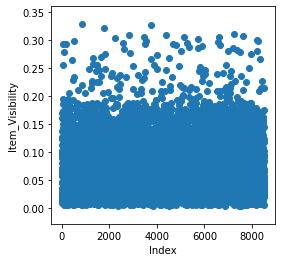

In [25]:
li = Outlier_list(column='Item_Visibility')
print('Outliers in Item_Visibility are:', li)
print('Size:',len(li))
Scatter(column='Item_Visibility')

In [26]:
pd.options.mode.chained_assignment = None
ls = list(df['Item_Visibility'][df['Item_Visibility']>0.20].index)
df['Item_Visibility'][ls] = 0.20

Outliers in Item_Visibility are: []
Size: 0


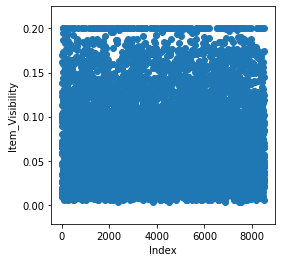

In [27]:
li = Outlier_list(column='Item_Visibility')
print('Outliers in Item_Visibility are:', li)
print('Size:',len(li))
Scatter(column='Item_Visibility')

Outliers in Item_Type are: []


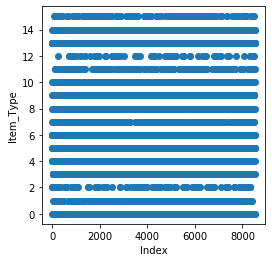

In [28]:
li = Outlier_list(column='Item_Type')
print('Outliers in Item_Type are:', li)
Scatter(column='Item_Type')

Outliers in Item_MRP are: []


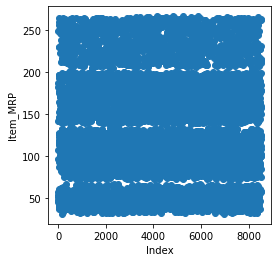

In [29]:
li = Outlier_list(column='Item_MRP')
print('Outliers in Item_MRP are:', li)
Scatter(column='Item_MRP')

Outliers in Outlet_Identifier are: []


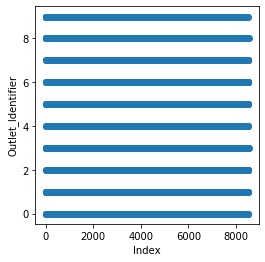

In [30]:
li = Outlier_list(column='Outlet_Identifier')
print('Outliers in Outlet_Identifier are:', li)
Scatter(column='Outlet_Identifier')

Outliers in Outlet_Establishment_Year are: []


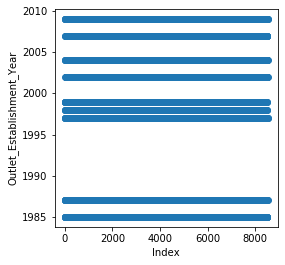

In [31]:
li = Outlier_list(column='Outlet_Establishment_Year')
print('Outliers in Outlet_Establishment_Year are:', li)
Scatter(column='Outlet_Establishment_Year')

Outliers in Outlet_Size are: []


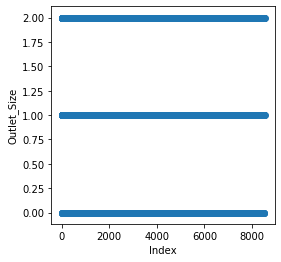

In [32]:
li = Outlier_list(column='Outlet_Size')
print('Outliers in Outlet_Size are:', li)
Scatter(column='Outlet_Size')

Outliers in Outlet_Location_Type are: []


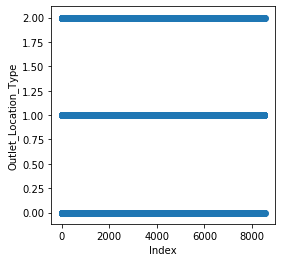

In [33]:
li = Outlier_list(column='Outlet_Location_Type')
print('Outliers in Outlet_Location_Type are:', li)
Scatter(column='Outlet_Location_Type')

Outliers in Outlet_Type are: []


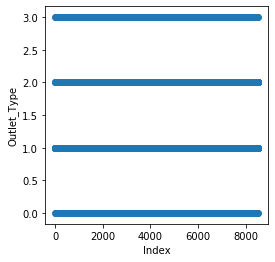

In [34]:
li = Outlier_list(column='Outlet_Type')
print('Outliers in Outlet_Type are:', li)
Scatter(column='Outlet_Type')

Outliers in Item_Outlet_Sales are: [130, 145, 276, 304, 333, 373, 456, 472, 661, 694, 753, 809, 935, 991, 997, 1009, 1138, 1254, 1450, 1506, 1859, 1998, 2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154, 3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676, 4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500, 5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537, 6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302, 7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201, 8245, 8447]
Total Outliers: 90


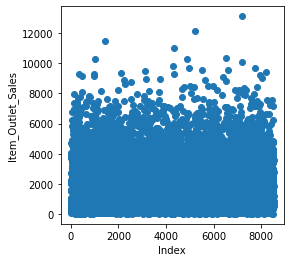

In [35]:
li = Outlier_list(column='Item_Outlet_Sales')
print('Outliers in Item_Outlet_Sales are:', li)
print('Total Outliers:',len(li))
Scatter(column='Item_Outlet_Sales')

In [36]:
'''while li!=[]:
    li = Outlier_list(column='Item_Outlet_Sales')
    df['Item_Outlet_Sales'][li] = df['Item_Outlet_Sales'].median()
    print('Iteration->',li,'Length:',len(li))'''

"while li!=[]:\n    li = Outlier_list(column='Item_Outlet_Sales')\n    df['Item_Outlet_Sales'][li] = df['Item_Outlet_Sales'].median()\n    print('Iteration->',li,'Length:',len(li))"

In [37]:
# df['Item_Outlet_Sales'].max() -> 6528.169

In [38]:
ls = list(df['Item_Outlet_Sales'][df['Item_Outlet_Sales']>6528.169].index)
df['Item_Outlet_Sales'][ls] = 6528.169

Outliers in Item_Outlet_Sales are: []
Total Outliers: 0


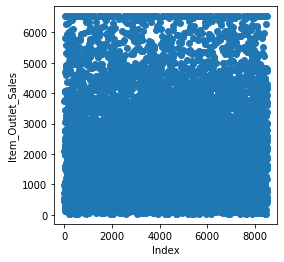

In [39]:
li = Outlier_list(column='Item_Outlet_Sales')
print('Outliers in Item_Outlet_Sales are:', li)
print('Total Outliers:',len(li))
Scatter(column='Item_Outlet_Sales')

In [40]:
#Inverse on Labelled Data
for i in range(7):
    df[columns[i]] = encoder[i].inverse_transform(df[columns[i]])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df.to_csv('Cleaned_Dataset.csv', index=False)